In [13]:
# import classy module
from classy import Class

In [22]:
# create instance of the class "Class"
model = Class()
# pass input parameters
model.set({'Omega_b':0.025,'Omega_cdm':0.75,'Omega_Lambda':0.0,'output':'tCl,pCl,lCl','lensing':'yes','root': 'output/base_'})
model.set({'Omega_k': 0.0})
model.set({'background_verbose':1, 'thermodynamics_verbose':1, 'perturbations_verbose':1, 'transfer_verbose':1})
model.set({'primordial_verbose': 1, 'spectra_verbose':1, 'nonlinear_verbose':1, 'lensing_verbose':1, 'output_verbose':1})
# run class
model.compute()
# get lensed Cls - apparently, classy can compute lensed Cls only up to 2500
cls = model.lensed_cl(2500) 
# clean the structure
model.struct_cleanup()


In [23]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]


In [27]:
# vary curvature by gradually decreasing it
var_name = 'Omega_k'
var_max = 0
var_min = var_max - 1
var_num = 5
var = {}
common_settings ={'Omega_b':0.025,'Omega_cdm':0.75,'Omega_Lambda':0.0,'output':'tCl,pCl,lCl','lensing':'yes','root': 'output/base_',
                  'background_verbose':1, 'thermodynamics_verbose':1, 'perturbations_verbose':1, 'transfer_verbose':1,
                  'primordial_verbose': 1, 'spectra_verbose':1, 'nonlinear_verbose':1, 'lensing_verbose':1, 'output_verbose':1}
#
#for i in range(var_num):
    # calculate curvature
 #   var_value = var_max - (var_max-var_min)*i/(var_num-1.)
 #   model.set(common_settings)
 #   model.set({var_name:var_value})
 #   model.compute()
 #   var[i] = model.lensed_cl(2500)
 #   model.struct_cleanup
    
model.set(common_settings)
model.set({'Omega_k': 0.17})
model.compute()
cls_k = model.lensed_cl(2500)
    
ll_k = cls_k['ell'][2:]
clTT_k = cls_k['tt'][2:]

    


In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi


<IPython.core.display.Javascript object>


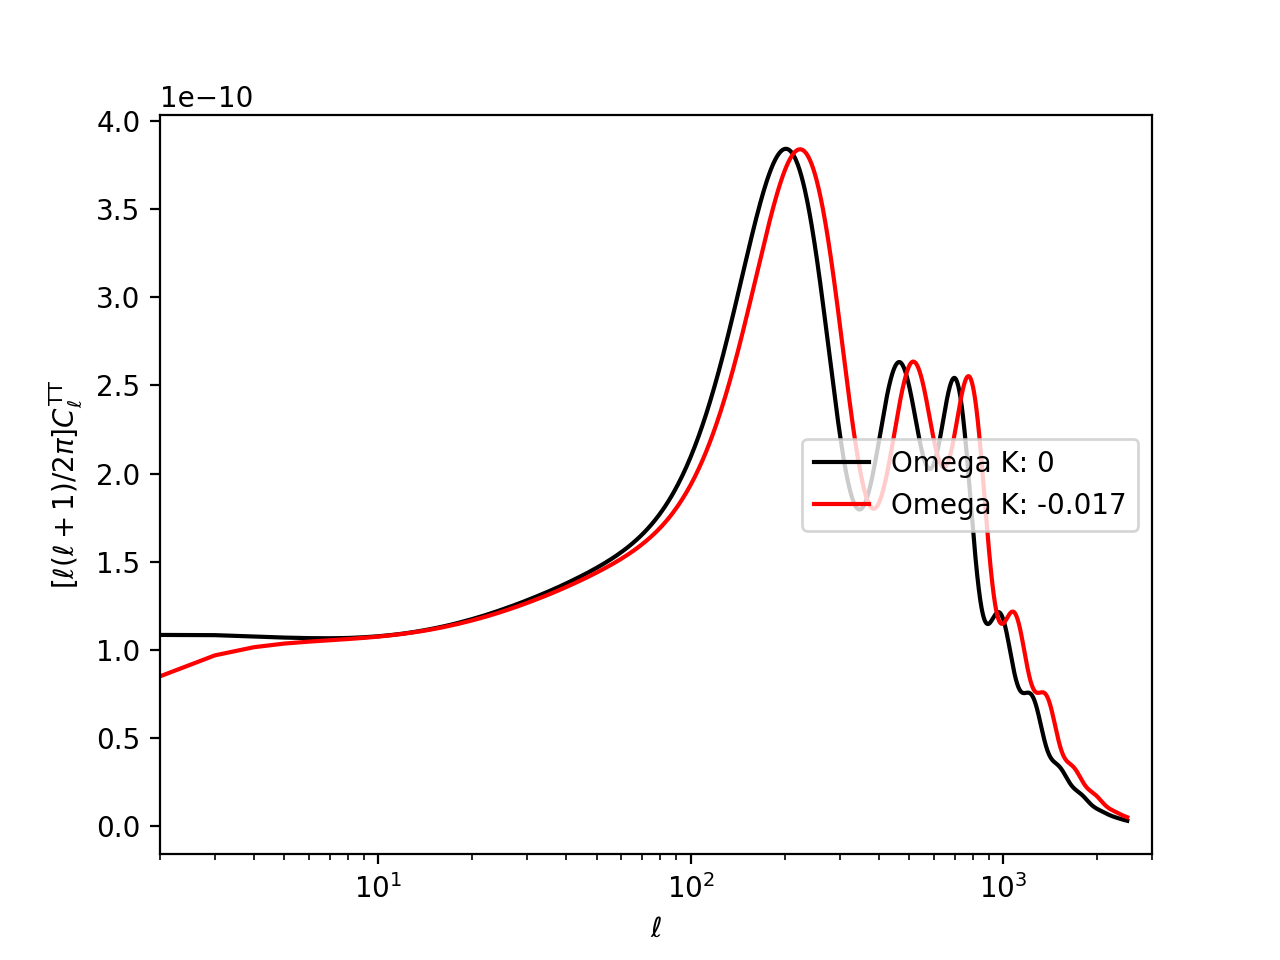

In [29]:
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,3000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'k-', label = 'Omega K: 0')
plt.plot(ll_k,clTT_k*ll_k*(ll_k+1)/2./pi,'r-', label = 'Omega K: -(?)0.017')
plt.legend(loc='right')
plt.show()